In [1]:
%load_ext sql
%sql duckdb://

In [2]:
from urllib.request import urlretrieve

_ = urlretrieve(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
    "penguins.csv",
)

In [3]:
%%sql --save data_with_nulls --no-execute
SELECT *
FROM penguins.csv

Running query in 'duckdb://'

Skipping execution...

Plotting using saved snippet : data_with_nulls


<Axes: title={'center': "'body_mass_g' from 'data_with_nulls'"}, xlabel='body_mass_g', ylabel='Count'>

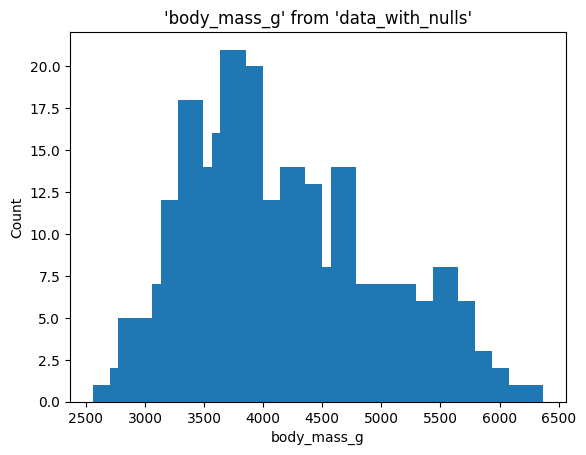

In [4]:
%sqlplot histogram --table data_with_nulls --column body_mass_g

Plotting using saved snippet : data_with_nulls


<Axes: title={'center': "'body_mass_g' from 'data_with_nulls'"}, xlabel='body_mass_g', ylabel='Count'>

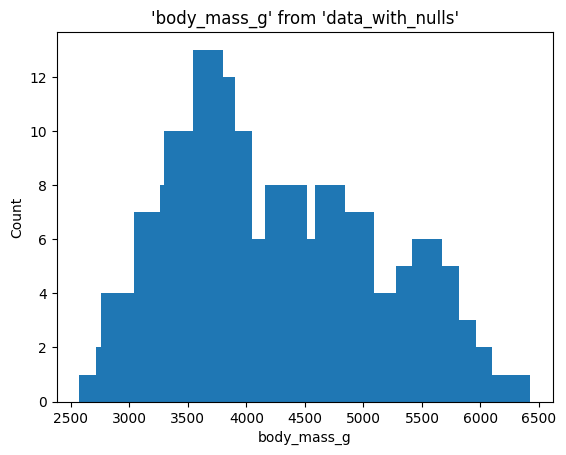

In [5]:
%sqlplot histogram --table data_with_nulls --column body_mass_g  --bins 100

Plotting using saved snippet : data_with_nulls


<Axes: title={'center': "Histogram from 'data_with_nulls'"}, ylabel='Count'>

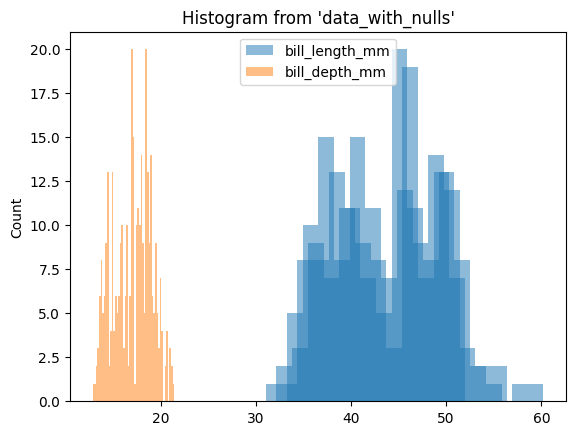

In [6]:
%sqlplot histogram --table data_with_nulls --column bill_length_mm bill_depth_mm